In [1]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
data = pd.read_csv('Krigged_Data up to 2017.csv')
data.head()

,FID_,DNAME_2011,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_leve,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female,Typh_Per,OBJECTID
0,NaN,ABIM,534,33.730702,2.747649,69,4,45.9,15.900000,102.300003,29.700001,18.500000,0.004946,3.1,52456,55510,0.206406,0
1,NaN,ADJUMANI,137,31.769442,3.225610,80,0,76.2,18.200001,110.000000,30.500000,18.799999,0.000608,5.3,108298,116953,0.052954,1
2,NaN,AGAGO,694,33.346874,2.909709,71,0,65.1,12.800000,104.300003,30.000000,18.400000,0.003047,0.0,110495,117297,0.268251,2
3,NaN,ALEBTONG,236,33.256240,2.267383,85,0,148.0,2.100000,111.900002,29.900000,17.299999,0.001037,1.7,110989,116552,0.091221,3
4,NaN,AMOLATAR,647,32.739009,1.619290,55,0,127.0,14.600000,120.000000,29.500000,17.299999,0.004396,1.7,73014,74152,0.250084,4


In [3]:
#printing the shape of the data
data.shape

(112, 18)

In [4]:
#Describing the data
data.describe()

,FID_,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_leve,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female,Typh_Per,OBJECTID
count,0.0,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000
mean,NaN,2334.687500,32.398602,1.108921,76.928571,2.026786,297.990179,17.005357,113.266964,28.602679,17.028571,0.006629,4.622321,150397.517857,1.578741e+05,0.902424,55.500000
std,NaN,7004.813885,1.429334,1.243355,9.710878,2.852089,747.509143,15.589907,14.454585,1.189705,1.238964,0.007833,5.201069,120176.774477,1.315655e+05,2.707562,32.475632
min,NaN,17.000000,29.681800,-1.222982,51.000000,0.000000,23.000000,1.900000,18.100000,24.700001,12.100000,0.000127,0.000000,31349.000000,2.294400e+04,0.006571,0.000000
25%,NaN,359.250000,31.254874,0.144675,70.000000,0.000000,105.750000,7.275000,106.325001,27.799999,16.375000,0.001566,1.200000,86153.750000,8.862200e+04,0.138860,27.750000
50%,NaN,1090.000000,32.526841,1.025632,80.500000,0.000000,216.500000,13.700000,114.149998,28.700001,17.100000,0.004252,3.800000,116810.500000,1.235340e+05,0.421316,55.500000
75%,NaN,2634.500000,33.683031,1.942605,85.000000,4.000000,297.000000,20.200001,122.825003,29.600000,17.725000,0.008035,5.300000,187371.750000,1.974322e+05,1.018310,83.250000
max,NaN,73019.000000,34.876671,3.606554,90.000000,10.000000,7928.000000,100.000000,134.399994,30.700001,19.100000,0.048451,33.000000,949035.000000,1.048383e+06,28.223939,111.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID_        0 non-null      float64
 1   DNAME_2011  112 non-null    object 
 2   Typh_Inc    112 non-null    int64  
 3   X_coord     112 non-null    float64
 4   Y_coord     112 non-null    float64
 5   HH_Wash     112 non-null    int64  
 6   PH_Lands    112 non-null    int64  
 7   P_Density   112 non-null    float64
 8   Urban_leve  112 non-null    float64
 9   ARainfall   112 non-null    float64
 10  Temp_Max    112 non-null    float64
 11  Temp_Min    112 non-null    float64
 12  Typh_Rate   112 non-null    float64
 13  Pn_Floods   112 non-null    float64
 14  P_male      112 non-null    int64  
 15  P_Female    112 non-null    int64  
 16  Typh_Per    112 non-null    float64
 17  OBJECTID    112 non-null    int64  
dtypes: float64(11), int64(6), object(1)
memory usage: 15.9+ KB


In [6]:
# Checking for missing values in the entire DataFrame
print("Missing values in the DataFrame:")
print(data.isnull().sum())

Missing values in the DataFrame:
FID_          112
DNAME_2011      0
Typh_Inc        0
X_coord         0
Y_coord         0
HH_Wash         0
PH_Lands        0
P_Density       0
Urban_leve      0
ARainfall       0
Temp_Max        0
Temp_Min        0
Typh_Rate       0
Pn_Floods       0
P_male          0
P_Female        0
Typh_Per        0
OBJECTID        0
dtype: int64


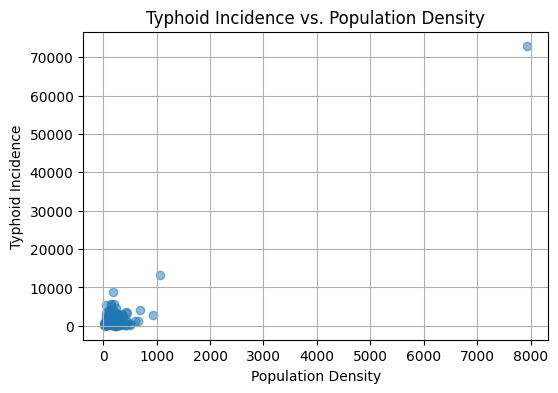

In [7]:
# Scatter plot of Typh_Inc vs. Population Density
plt.figure(figsize=(6, 4))
plt.scatter(data['P_Density'], data['Typh_Inc'], alpha=0.5)
plt.title('Typhoid Incidence vs. Population Density')
plt.xlabel('Population Density')
plt.ylabel('Typhoid Incidence')
plt.grid(True)
plt.show()

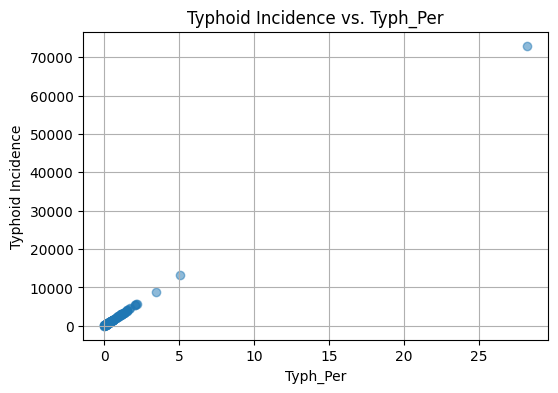

In [8]:
# Scatter plot of Typh_Inc vs. Typh_Per
plt.figure(figsize=(6, 4))
plt.scatter(data['Typh_Per'], data['Typh_Inc'], alpha=0.5)
plt.title('Typhoid Incidence vs. Typh_Per')
plt.xlabel('Typh_Per')
plt.ylabel('Typhoid Incidence')
plt.grid(True)
plt.show()

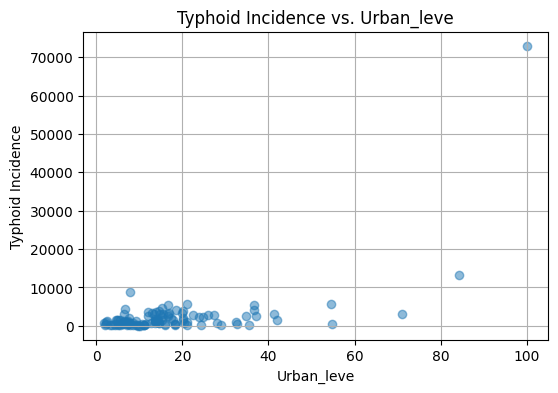

In [9]:
# Scatter plot of Typh_Inc vs. Urban_leve
plt.figure(figsize=(6, 4))
plt.scatter(data['Urban_leve'], data['Typh_Inc'], alpha=0.5)
plt.title('Typhoid Incidence vs. Urban_leve')
plt.xlabel('Urban_leve')
plt.ylabel('Typhoid Incidence')
plt.grid(True)
plt.show()

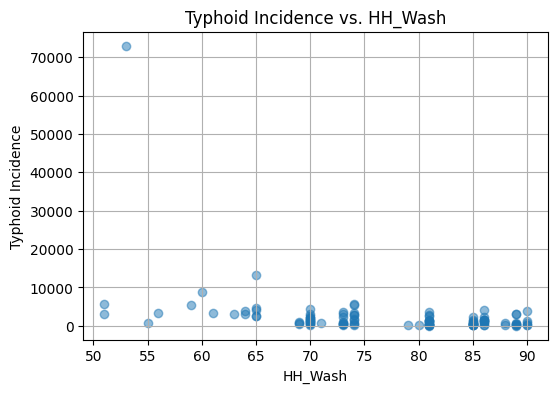

In [10]:
# Scatter plot of Typh_Inc vs. HH_Wash
plt.figure(figsize=(6, 4))
plt.scatter(data['HH_Wash'], data['Typh_Inc'], alpha=0.5)
plt.title('Typhoid Incidence vs. HH_Wash')
plt.xlabel('HH_Wash')
plt.ylabel('Typhoid Incidence')
plt.grid(True)
plt.show()

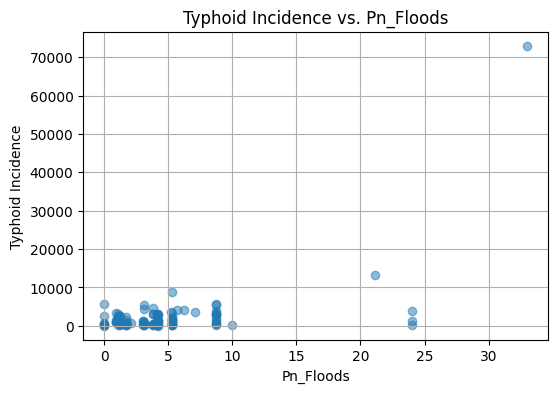

In [11]:
# Scatter plot of Typh_Inc vs. Pn_Floods
plt.figure(figsize=(6, 4))
plt.scatter(data['Pn_Floods'], data['Typh_Inc'], alpha=0.5)
plt.title('Typhoid Incidence vs. Pn_Floods')
plt.xlabel('Pn_Floods')
plt.ylabel('Typhoid Incidence')
plt.grid(True)
plt.show()

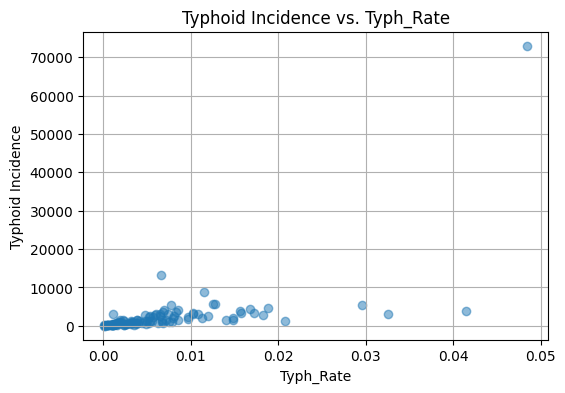

In [12]:
# Scatter plot of Typh_Inc vs. Typh_Rate
plt.figure(figsize=(6, 4))
plt.scatter(data['Typh_Rate'], data['Typh_Inc'], alpha=0.5)
plt.title('Typhoid Incidence vs. Typh_Rate')
plt.xlabel('Typh_Rate')
plt.ylabel('Typhoid Incidence')
plt.grid(True)
plt.show()

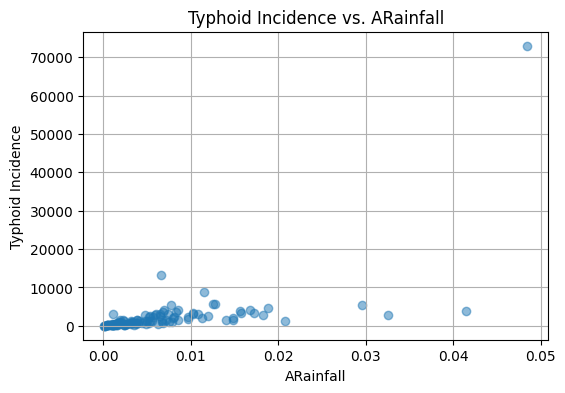

In [13]:
# Scatter plot of Typh_Inc vs. ARainfall
plt.figure(figsize=(6, 4))
plt.scatter(data['Typh_Rate'], data['Typh_Inc'], alpha=0.5)
plt.title('Typhoid Incidence vs. ARainfall')
plt.xlabel('ARainfall')
plt.ylabel('Typhoid Incidence')
plt.grid(True)
plt.show()

Multi Linear Regression on Krigged_Data Dataset using 5-fold Cross Validation to predict the number of typhoid incidences.

In [14]:
# Dropping irrelevant columns
data.drop(columns=["FID_", "DNAME_2011", "OBJECTID", "Temp_Max",	"Temp_Min",	"P_male",	"P_Female"], inplace=True)

In [15]:
print("Shape of the data: ", data.shape, "\n")
print("Columns of the dataset: ", data.columns, "\n")

Shape of the data:  (112, 11) 

Columns of the dataset:  Index(['Typh_Inc', 'X_coord', 'Y_coord', 'HH_Wash', 'PH_Lands', 'P_Density',
       'Urban_leve', 'ARainfall', 'Typh_Rate', 'Pn_Floods', 'Typh_Per'],
      dtype='object') 



In [16]:
# Separate features (X) and target variable (y)
X = data.drop(columns=["Typh_Inc"])
y = data["Typh_Inc"]

print("Shape of X: ", X.shape)
print("Shape of Y: ", y.shape, "\n")

Shape of X:  (112, 10)
Shape of Y:  (112,) 



In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [19]:
# using linear regtession 
regression = LinearRegression()
model= regression.fit(X_train,y_train)

In [20]:
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
validation_score

array([-7.93447060e-13, -5.60192283e-13, -3.99741327e-13, -8.07199559e-13,
       -3.86604692e-13])

In [21]:
np.mean(validation_score)

-5.894369840718937e-13

In [22]:
y_pred=regression.predict(X_test)
y_pred

array([ 1368.25873156,  1274.51752844,  1349.4286205 ,  1474.82624225,
       11224.59361351,  1668.85825202,  1267.1492243 ,  1416.15270837,
        1304.40009524,  1458.58868273,  1590.26300739,  1294.16634039,
        2043.55016392,  1466.09343687,  1334.00976215,  1266.19407359,
        1341.92386654,  1357.34272565,  1284.61483443,  1341.10516588,
        1297.85049233,  1598.99581187,  1310.81324927])

In [23]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

167310377.27696568
3561.7971988501226
12934.851266132351


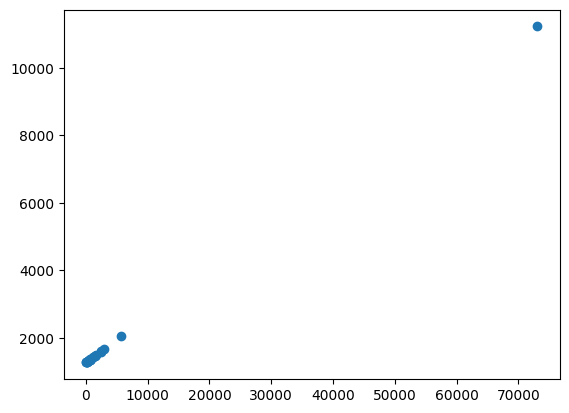

In [24]:
plt.scatter(y_test,y_pred)